# Lab 13: The Markov chain Monte Carlo (MCMC) method

**Please enter your name and student number in the markdown cell below** then press `Shift` + `Enter`.

* Name:    **ELENA COLANGELI**
* SID:     **190043294**

## Markov chain Monte Carlo optimisations

Optimising or finding the minima of functions is a surprising application of the use of random numbers.  These types of simulations find use in a variety of areas of statistical physics, quantum mechanics, and strangely enough curve fitting.

The general strategy for finding the minimum of a function $F$ is the following.  We make a guess at the initial variables and compute the value of the function $F$.  We then conduct a random walk in these variables, accepting those moves that reduce the value of F as well as some small random fluctuations to larger values of $F$.  This random walk through parameters is continued until the parameters converge and fluctuate around a fixed value.  This strategy for minimisation utilises random numbers to explore parameter values without bias, to generate fluctuations that allow the solution to escape local minima in parameter space, and provides a distribution of states around minima.

The mathematical foundations for why and how this model works are a little beyond the scope of this module (*e.g.*, how to choose the acceptance rate, how to analyse the distribution of states produced - see the scan from *Computational Physics* by Newman on the QM+ page for a more complete development).  However, the algorithm is simple enough that we can see how it functions and produces a reasonable result for increasingly complicated problems.

We will use a variant of the *Metropolis-Hastings* algorithm.  This type of Markov chain Monte Carlo simulation involves the following steps:
1. Choose a starting state, which we’ll call state 0.
2. *Propose* a move at random from an allowed set of moves. This would take the system from state $i$ to a new state $i+1$.
3. Calculate the value of the *acceptance probability* $P_\mathrm{a}$
$$
    P_\mathrm{a} = \begin{cases}
                 1 & \text{if}\qquad F_{i+1} < F_i  \\
                 \exp\{-\beta(F_{i+1} - F_{i})\} & \text{if}\qquad  F_{i+1} \geq F_i
          \end{cases}
$$
where $F_i$ is the value of the function $F$ at state $i$. In other words, if we find a lower value of the function, we will certainly accept the move; if we find a higher value, there is still some probability that we will accept it, depending on how much higher it is and on the value of the acceptance parameter $\beta$.
4. With probability $P_\mathrm{a}$ *accept* the proposed move, and change the state of the system to the new one; otherwise reject it, meaning the system stays in the current state for one more step of the calculation.
5. Measure the value of the quantities of interest in the current state and add it to a running sum of such measurements (or store the values of the chain and analyse them later).
6. Repeat from step 2 until the value of $F_i$ effectively converges.

This process produces a series of states of the system, or a *Markov chain* of states.

The process is a random walk through parameter space.  However, not all steps are accepted; only those that optimise our global function $F$ with some allowance for fluctuations that are controlled through the step sizes and the acceptance coefficient $\beta$.

For our simple version of this algorithm we will store all states of the system and analyse them when we are done iterating.


## A 2D function with multiple minima

Here we'll use a simple illustrative example of the method to find the minima of a 2-d function that has multiple local minima in addition to its global minimum.  
$$
  \text{func_2d}(x,y) = r^2 \bigg(1 - \tfrac{1}{2}\sin^2 \left( \frac{\pi r}{5} \right) \bigg)
$$
where
$$
    r^2 = x^2 + y^2
$$
By inspection this function clearly has a global minimum at $(0,0)$, but due to the oscillating $\sin$ function has infinitely many other local minima, which form concentric circles in the $xy$ plane.  In general, this is a tricky problem to solve with standard approaches that can be “fooled” by local minima if we do not make an initial guess close enough (*e.g.*, think how Newton-Raphson would respond to this shape).  In higher-dimensional parameter spaces  visualisation becomes problematic.  So, here we use the simple 2-D function above to illustrate the method.

**Complete the function `func_2d` below with the mathematical function listed above.**

**Make a 3D surface plot of the function using the code below, plotting in the range $-25 \leq x, y \leq 25$, and visually confirm the location of the global and local minima.**  

In [2]:
import numpy as np
from numpy.random import random, seed
import matplotlib.pyplot as plt

Text(0.5, 0, 'func_2d(x,y)')

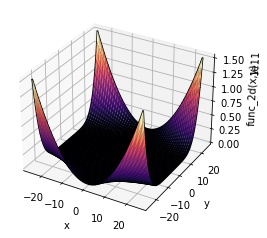

In [3]:
from mpl_toolkits.mplot3d import Axes3D
# Axes3D import enables using projection='3d' in add_subplot s


def func_2d(x,y):
    """func2d - a mathematical function of x and y with multiple local minima
    """
    return (1.3-x+x*y)**2+(0.1-x+x*y**2)**2 + (1.6-x+x*y**3)**2 # complete this function to match the mathematical definition above

# Code I've included to make a 3D surface plot for you

x = np.linspace(-25, 25, 100)  #  setup grid points for surface plotting
y = np.linspace(-25, 25, 100)

X, Y = np.meshgrid(x, y)

Z = func_2d(X, Y)

fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_wireframe(X, Y, Z, color='black')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='magma', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('func_2d(x,y)')

###  Finding the minimum of a function of more than one variable

Here we seek to minimize the function `func_2d` with respect to some parameters ($x$ and $y$ in this case).  In general, finding the minimum of a function in more than one dimension is difficult. 

We deliberately start the function off some way from the global minimum, at $x = y = 12$ which is near the second “ring” minimum. At each step we allow both $x$ and $y$ to vary by up to $\pm 1$.

Initially we will use a value of $\beta = 0.1$ and run our Markov chain for 100 000 steps.


In [1]:
nsteps = 100000
seed(5)           # random number generator seed
beta = 1000        # acceptance parameter
step_size = 0.1    # maximum step size in x and y

current_x, current_y = 0, 0 # starting position
current_F = func_2d(current_x, current_y)

x, y, F = [current_x], [current_y], [current_F]
# set up lists that we can store our path in

for i in range(nsteps):
    step = np.random.uniform(-step_size, +step_size, 2) # pick a random step between -step_size and +step_size.
    # you can either do this twice, once each for x and y, or pick a random array of length 2 to start with
    new_x = current_x + step[0] # add on the x step to current_x
    new_y = current_y + step[1] # add on the y step to current_y
    new_F = func_2d(new_x, new_y)
    dF = new_F - current_F

    if dF <= beta: # put the Metropolis-Hastings condition here: do we accept the "new" values or not?
        # if we do, update the "current" values to the "new" values
        current_x, current_y, current_F = new_x, new_y, new_F

    # in any case, add the "current" values to the appropriate lists
    x.append(current_x)
    y.append(current_y)
    F.append(current_F)

#plotting the walk to a solution:
plt.figure()
plt.title(f"MCMC Simulation with $n = {nsteps}$ steps")
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y)
plt.gca().set_aspect('equal')

NameError: name 'seed' is not defined

This path taken through the parameter space – in this case the $xy$-plane – is the “chain” of states that we will analyse. Can you see the chain initially explore the “ring” before, hopefully, eventually finding the central minimum?

The portion of the path or chain where the state changes by large steps before finding the minimum is commonly referred to as the “burn-in”.  The parts of the chain where the solution is fluctuating about the function's minimum is referred to as 'the posterior'.  Analysing the posterior can provide information both about the coordinates in phase space (again $x-y$ in this simple example) where the minimum exists. The distribution of states as the simulation fluctuates around the minima reflect the probability distribution of possible states. 

**Plot the value of the function against the log of the iteration number, or index of the state in the chain.  Identify the “burn in” portion of the chain and the “posterior”.**  

*Hint:* To make this *semi-log* plot, it is easiest to use `plt.semilogx()`; as always, see `?plt.semilogx()` for information on how to use this. You don’t actually need to specify $x$ values since by default `matplotlib` will plot against index.

Text(0, 0.5, 'function')

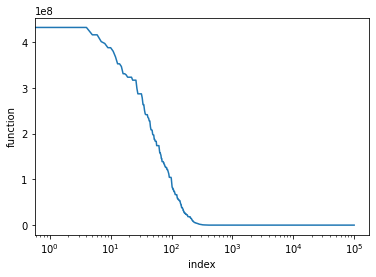

In [6]:
plt.semilogx(F)
plt.xlabel("index")
plt.ylabel("function")

### Isolating the posterior distribution

If your model appears to have converged to and fluctuate about a global minimum you can analyse distribution of all the states in the chain to identify a best single solution and the distribution about it.

To do this you will need to 'slice' off 'the burn in' phase of the chain and the first bit of 'the posterior.'

The basic requirements in slicing here are that, 

- you slice far enough away from the initial state that it is forgotten in the posterior part of the chain, and 

- you have enough points around the minimum to characterise the distribution there.

**Using your plot of the $f(x,y)$ vs. $\log(i)$ identify a suitable array index to slice your chain and store the posterior in new arrays**.



In [12]:
#slice data into the posterior

islice = 10**3 # choose an appropriate index here so that everything after it is posterior
xpost = x[islice:]
ypost = y[islice:]
Fpost = F[islice:]

You will now do some basic analysis on this distribution of points in the chain to characterise the optimal values (ones that find the minima in the function).

Again, you may find the `np.argmin` function helpful here. Recall from previous labs that given a list or array of values `A`, the smallest value is `np.min(A)`, and the *index* of this smallest value is `np.argmin(A)`. (In the case of an array, `A.min()` and `A.argmin()` also work.) This is illustrated in the cell below. **Run it a few times to see how this works.**

In [13]:
seed()    # if you do not use a seed, the seed is generated from the system clock!

A=random(6)
print("6 random numbers = \n ",A)
imin = np.argmin(A)
print("The minimum value is in element {:2d} and has value {:20.16f}".format(imin,A[imin]))

# or equivalently in one line
print("The minimum value is in element {:2d} and has value {:20.16f}"
      .format(np.argmin(A),np.min(A)))

6 random numbers = 
  [0.17237534 0.21861174 0.51137716 0.63892254 0.94404944 0.34838238]
The minimum value is in element  0 and has value   0.1723753443200292
The minimum value is in element  0 and has value   0.1723753443200292


**Find the values of $x$ and $y$ that provide the minimum value of the function.  Using nicely formatted output print the following:**
- the values of the function at this location
- the average values of $x$ and $y$ in the posterior distribution.


In [14]:
coords = (xpost, ypost)

array = []
for i in range(len(xpost)):
        f = Fpost[i]
        array.append(f)

print("The minimum value is in element {:2d} and has value {:20.16f}"
      .format(np.argmin(array),np.min(array)))
print("The average x value in the posterior distribution is {:15.15f} and the average y value is {:15.15f}"
      .format(sum(xpost)/len(xpost),sum(ypost)/len(ypost)))

The minimum value is in element 77595 and has value   0.0000011909195763
The average x value in the posterior distribution is -0.002941060108213 and the average y value is 0.002038385545218


### Graphical analysis of the posterior distribution

The distribution of states in the posterior portion of the chain contains statistical information about the solution.  In statistical physics simulations states reflect the distribution of states (e.g., the Maxwell-Boltzmann distribution).  In the usage here these states may reflect the uncertainty in the 'best' solution.  The distributions may also be affected by the step sizes, the acceptance conditions (e.g. $\beta$) and other aspects of the model.

**Plot histograms of $x$ and $y$ of the posterior solution** using `plt.hist()`. 

**What shape are these histograms? Can you explain why these have the shape they do?**

(array([3.9667e+04, 2.7677e+04, 1.7530e+04, 8.4910e+03, 3.6750e+03,
        1.3350e+03, 4.1800e+02, 1.7500e+02, 1.6000e+01, 1.7000e+01]),
 array([1.19091958e-06, 4.86359771e-02, 9.72707633e-02, 1.45905549e-01,
        1.94540336e-01, 2.43175122e-01, 2.91809908e-01, 3.40444694e-01,
        3.89079480e-01, 4.37714267e-01, 4.86349053e-01]),
 <a list of 10 Patch objects>)

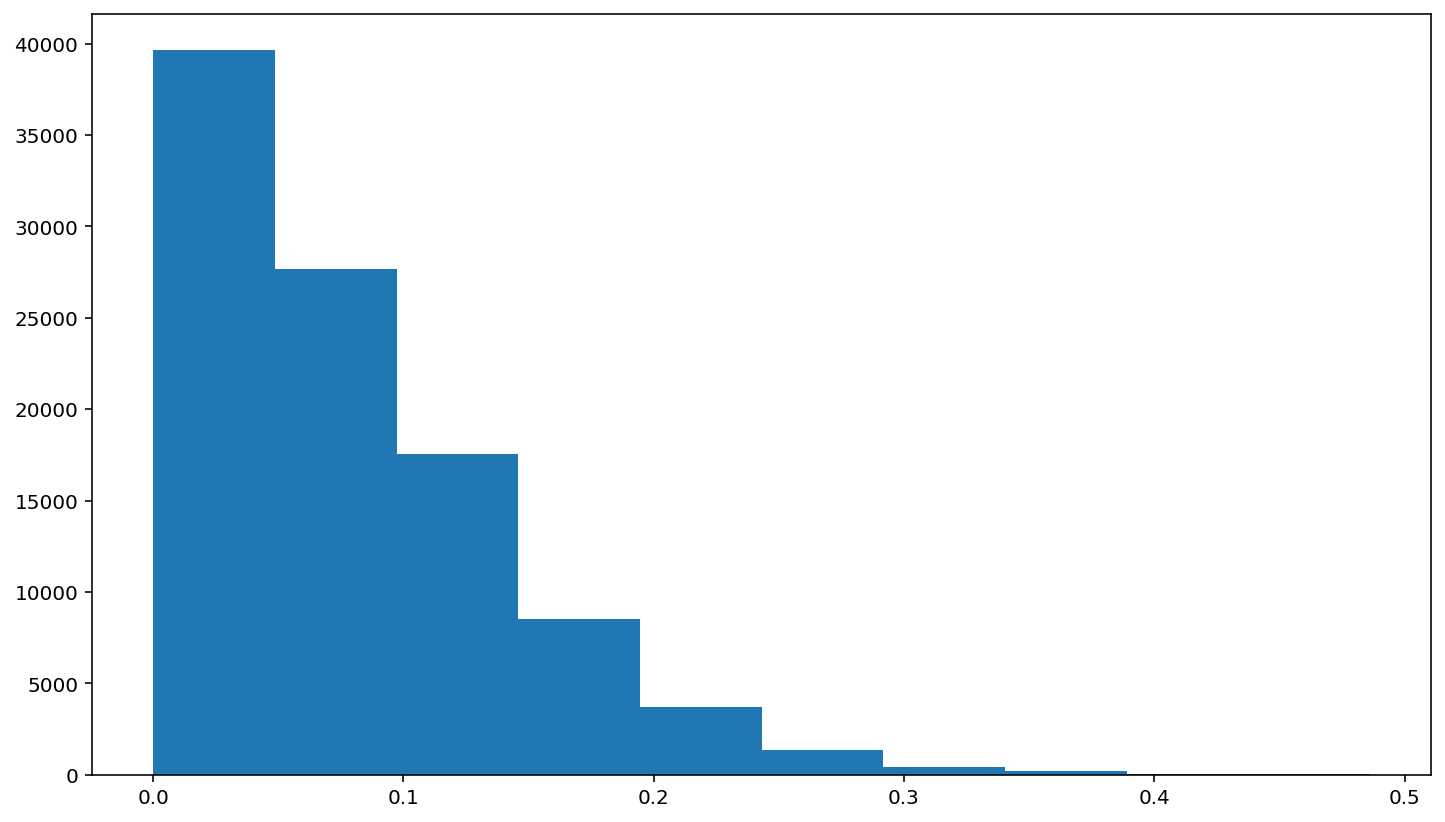

In [15]:
plt.hist(Fpost)

When we are optimising in more than one dimension we can also look for correlations between the 'best fit' parameters.  Here this can be done by looking at a scatter plot of the points in the posterior distribution.  Look at `?plt.scatter()` for information about scatter plots and consult the documentation for how to add colour and scale.

In the example below the points are given a colour that is scaled with the logarithm of the function we are minimising (*i.e.*, $\log_{10}\{\text{func_2d}(x,y)\}$).  This makes it abundantly clear where the minimum is and how narrow or wide this minimum is.  


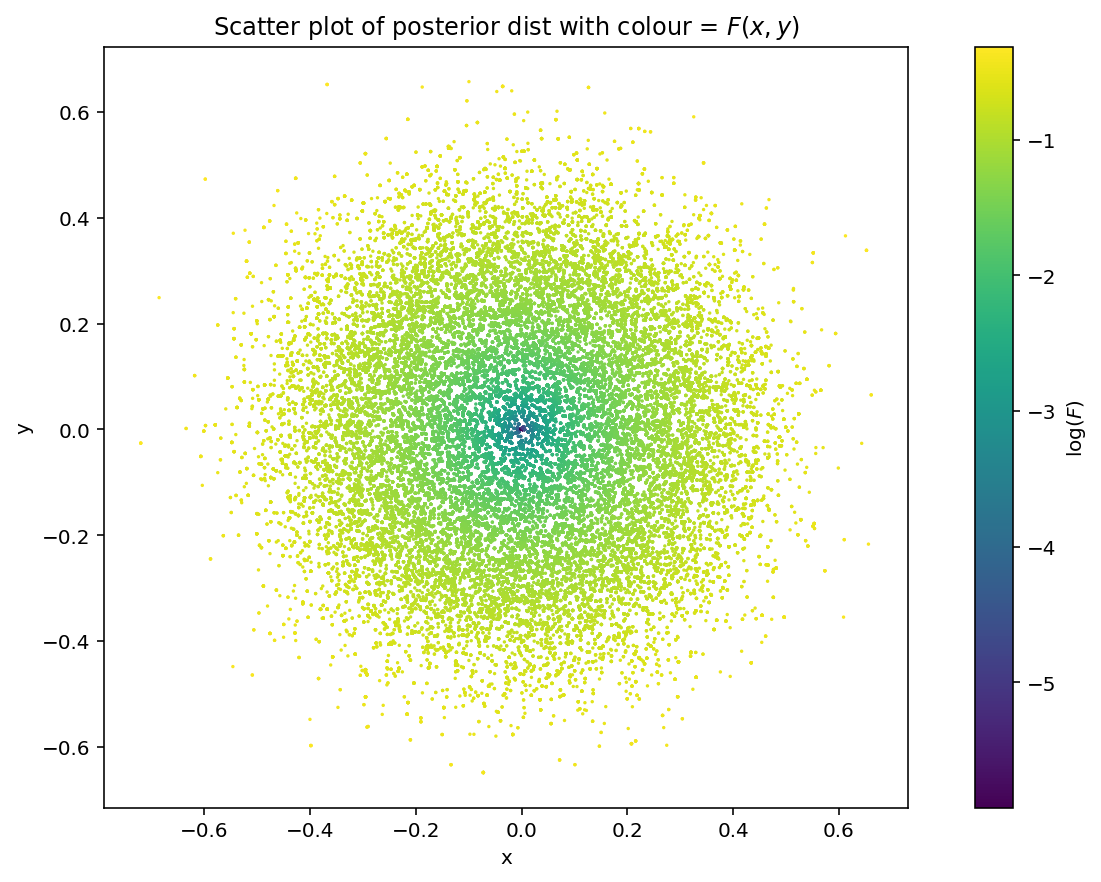

In [16]:
imin = np.argmin(Fpost)
imax = np.argmax(Fpost)

plt.figure()
plt.scatter(xpost,ypost,s=.5,
            c=np.log10(Fpost),
            vmin=np.log10(Fpost[imin]),
            vmax=np.log10(Fpost[imax]))
plt.colorbar(label='$\log(F)$')
plt.title('Scatter plot of posterior dist with colour = $F(x,y)$')
plt.xlabel('x')
plt.ylabel('y')
plt.gca().set_aspect('equal')

### Explore the solution

* Try a few different seed values for the random number generator.  Do you obtain similar results?
* How does the solution and distribution depend on the value of $\beta$ for the same initial guess?  Try varying $\beta$ by factors of 10 larger or smaller and see how the solution changes.
* How does the solution depend on the step size of the random walk?  Try different step sizes and see how it affects the results.
* How does the solution depend on the starting point ($x,y$)?  Try different values as the starting point and see if you get different results.  Remember your method needs to be able to “walk” to the minimum.

In exploring these questions, try to predict what will happen before trying it with your code.  Then use your code to test your prediction and develop some intuition about how the model works and the solution it might obtain.

**Open a new markdown cell below and write a few sentences to record your observations**.

▶ **CHECKPOINT 1**

**Different seeds**

The plot changes slightly as the seeds get larger, with the line getting smoother. However, the posterior stays in the same area and has roughly the same size and shape - the histogram and log plot remain almost unchanged.

**Different $\beta$**

As $\beta$ gets larger, the posterior grows in size, as the x and y guesses fluctuate more. The histogram plot changes from having decreasing bins to slightly more random distributions (at =1), and the scatterplot has a larger amount of points, so many that at $\beta = 10$ we almost cannot make out any dots at all. At this value, the posterior occupyins most of the first plot. At $\beta = 100$, the first plot and scatter one have the same shape, and the shape resembles that of the random walks in lab13.

**Different step size**

At larger step sizes, the graph unwinds very loosely, and the scatterplot shows almost no points, as the posterior is small. At step_size = 100, the posterior disappears completely, leaving a line. The scatterplot has a handful of points and the histogram has random bins, with some missing. The log plot soesn't show many fluctuations. At smaller values (0.1) the first plot shows a semi-circle with a zigzag line coming out of it, the posterior isn't a blob of points anymore, causing the scatterplot to also show a semi-circle. The log plot has a distinct minimum to then grow again - as opposed to more regular fluctuations.

**Different starting point (x,y)**

A smaller x,y gives a larger scale graph, so the posterior looks big, but the scatterplot is the same as the original one. Starting with different numbers (x = 10, y = 2) gives a similar plot to the original, with slightly larger oscillations in the posterior. Using large x and y gives a "further out" view of the original plot, but the posterior remains almost unchanged.

## Non-linear fitting with the Metropolis-Hastings MCMC method

Here we look to fit a series of observed data points with a non-linear function. This is one of the most common numerical tasks in science.  There are several different numerical approaches for obtaining a fit (*e.g.*, non-linear Newton-Raphson), including some contained in Python modules (*e.g.*, `scipy.optimize.curve_fit`).

However, since the basic operation of fitting is to reduce the norm of the residuals between a fitting function and the data points (*i.e.*, the “chi-squared”, $\chi^2$), the Metropolis minimisation algorithm described above can readily be adapted to this problem. This is particularly useful in higher-dimensional parameter spaces.  Here we’ll use a slightly unorthodox Markov Chain Monte Carlo method to explore the range of parameters that are consistent with a simulated data set.

The task we will set ourselves is to fit the peak in the following data set:

In [5]:
import numpy as np
import matplotlib.pyplot as plt
data_x = np.array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200.])
data_y = np.array([10.6 , 16.  , 45.  , 83.5 , 52.8 , 19.9 , 10.8 ,  8.25,  4.7 ])
data_y_err = np.array([4., 4., 4., 4., 4., 4., 4., 4., 4.])

We will fit a *Lorentzian* peak of the form

$$
L(x) = \frac{A}{(x - x_0)^2 + \gamma^2}.
$$

The Lorenztian function is commonly used when fitting intensity as a function of wavelength to identify spectral lines.  With a proper fit, the value of $x_o$ is the wavelength of of the central peak of an emmission or absorption line, $A$ is related to the intensity and $\gamma^2$ the width of the line.  So, finding best-fit values of these parameters is a way of measuring of the properties of spectral lines.

Here our fitting parameters are $\mathbf{p} = (A, x_0, \gamma^2)$ which we will represent in Python by `param = (A, x0, gammasq)`.

**Write, the Lorentzian function:**

In [6]:
def lorentzian(x, param):
    """Calculates a Lorentzian function at x with parameters param = (A, x0, gamma)."""
    A, x0, gammasq = param
    return A/((x - x0)**2+gammasq) # Lorentzian function here


**Find a good guess at the initial parameters $A$, $x_o$, and $\gamma^2$ that produce a good fit to the data.  Plot them on top of the data.** This time let’s use the `errorbar()` function to plot including error bars:

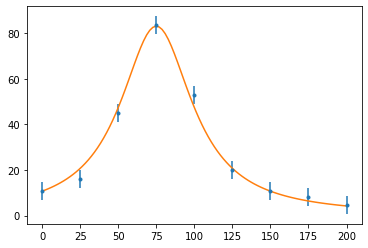

In [7]:
plt.figure()
plt.errorbar(data_x, data_y, fmt='.', yerr=data_y_err)
param_guess = 69000,75,830 # a suitable guess

xplot = np.linspace(0,200,100)
yplot = lorentzian(xplot,param_guess)

plt.plot(xplot,yplot)

### Assessing goodness of fit

Recall that we assess the goodness of fit with some norm of the residuals.  Here we will use the weighted chi-squared function,

$$
\chi^2 = \sum_i\left( \frac{(f(x_i) - y_i)}{\sigma_i} \right)^2
$$
where $\sigma_i$ is the error in the measured $y_i$ values.

**Compute the weighted $\chi^2$ of the fit.**  We will be doing this repeatedly, so it is a good idea to write a function for it.

In [8]:
def weighted_chi2(fitting_function,data,fit_params):
    data_x,data_y,data_y_err = data
    fit_y = fitting_function(data_x,fit_params)

    return sum(((fit_y-data_y)/data_y_err)**2) # fill in the formula here

print("Weighted chi-squared = ",weighted_chi2(lorentzian,(data_x,data_y,data_y_err),
                                              param_guess))

Weighted chi-squared =  3.8553566383362123


**Now, try to improve the fit by adjust the parameters of your 'guess fit' to reduce the $\chi^2$ as much as possible.**  

### MCMC Metropolis Fit

Here we will use the MCMC Metropolis algorithm described to develop a better fit.  In this example, instead of making a random walk through the $x-y$ plane as we did above, we will be 'walking' through the $A$, $x0$, $\gamma^2$ three-dimensional parameter space.  

Here, each “state” is a set of $A$, $x_0$, $\gamma^2$.  The random walk will sample parameter values away from the previous state.  The function we are attempting to minimise is the $\chi^2$ function.  Specifically, if the new state reduces the value of $\chi^2$ then we accept it.  If it results in an increase in $\chi^2$, we might still accept it if

$$
\\ 
\text{random()}  < \exp\{-\beta(\chi^2_{i}-\chi^2_{i-1})\},
\\
$$
where $i$ indicates the proposed state and $i-1$ the previous one.


**Using the code for minimizing `func_2d` above as a guide, adapt the code below so that it takes random steps through the three-dimensional parameter space.** The maximum step size for each parameter should be a separately adjustable parameter. 

(In practice, the step needs to be large enough to change the $\chi^2$ value enough to keep the random walk moving.  In other words, if the step size is too small, you don't walk far enough to find the global minimum.)


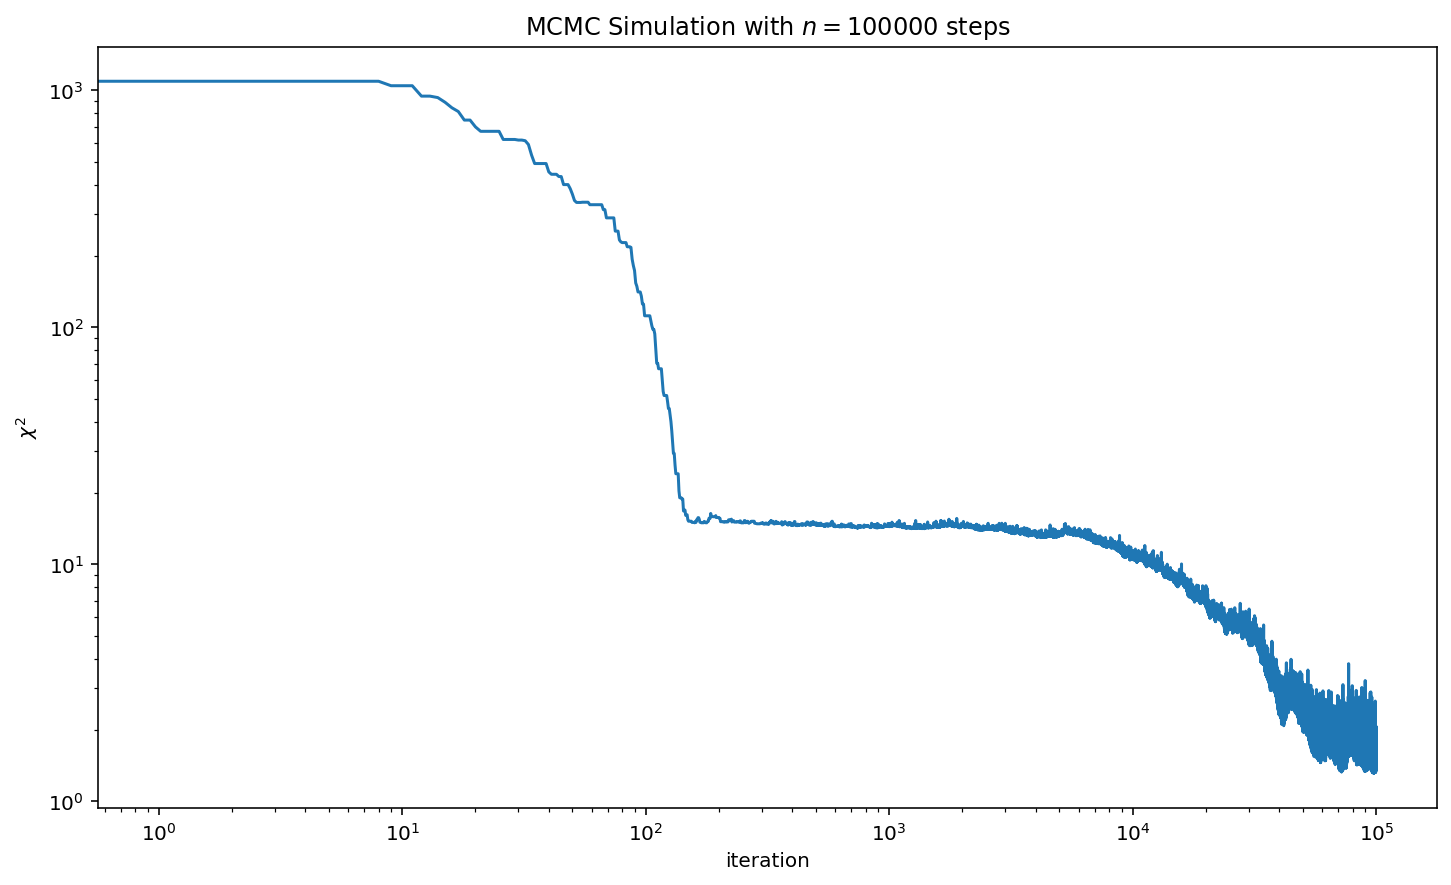

In [69]:
nsteps = 100_000
seed(1)           # random number generator seed
beta = 5         # acceptance parameter

# The step size in each parameter
# You will need to adjust these and see how they affect the solution
# They need not all be the same size, indeed different sizes may work best.

A_step_size = 50
x0_step_size = 1
gammasq_step_size = 30

# the data we're fitting
data = (data_x,data_y,data_y_err)

# initial guesses
current_A =  100000
current_x0 = 100
current_gammasq = 600

current_chisq = weighted_chi2(lorentzian,data,(current_A, current_x0, current_gammasq))

A, x0, gammasq, chisq = [current_A], [current_x0], [current_gammasq], [current_chisq]

for i in range(nsteps):
    A_step = np.random.uniform(-A_step_size, +A_step_size)
    x0_step = np.random.uniform(-x0_step_size, +x0_step_size)
    gammasq_step = np.random.uniform(-gammasq_step_size, +gammasq_step_size)

    new_A = current_A + A_step
    new_x0 = current_x0 + x0_step
    new_gammasq = current_gammasq + gammasq_step

    new_chisq = weighted_chi2(lorentzian,data,(new_A, new_x0, new_gammasq))

    dchisq = new_chisq - current_chisq

    if random() < np.exp(-beta*(dchisq)):
        current_A = new_A
        current_x0 = new_x0
        current_gammasq = new_gammasq
        current_chisq = new_chisq

    A.append(current_A)
    x0.append(current_x0)
    gammasq.append(current_gammasq)
    chisq.append(current_chisq)


#plot chi-squared vs iteration number:
plt.figure()
plt.title(f"MCMC Simulation with $n = {nsteps}$ steps")
plt.xlabel('iteration')
plt.ylabel('$\chi^2$')
plt.loglog(chisq)

▶ **CHECKPOINT 2**

### Graphical analysis of the posterior

**Using the plot above, identify the place to slice and examine the properties of the posterior.** 

**With nicely formatted output, print the values of the fitting parameters ($A$, $x_o$, and $\gamma^2$) that minimise $\chi^2$ and provide the best fit.** If you are keen you may try comparing them to fit parameters obtained via another method (e.g.,  using `scipy.optimize.curve` to construct a fit).

In [70]:
#slice data into the posterior

islice = 10**3
A_post = A[islice:]
x0_post = x0[islice:]
gammasq_post = gammasq[islice:]
chisq_post = chisq[islice:]

imin = np.argmin(chisq_post)
min_chi = np.min(chisq_post)

print("The minimum value is in element {:2d} and has value {:20.16f}"
      .format(imin, min_chi))
print("The A value at that point is {:15.15f}, the x0 value is {:15.15f}, and the gamma^2 value is {:15.15f}"
      .format(A_post[imin], x0_post[imin], gammasq_post[imin]))

The minimum value is in element 96588 and has value   1.3171442893957956
The A value at that point is 67016.968510431950563, the x0 value is 77.478582375912168, and the gamma^2 value is 791.113898819125211


A useful aspect of the posterior distribution is that it can illustrate how large a region of parameter space around the minimum provides a similar solution (e.g., value of $\chi^2$).  This can be used to estimate the uncertainties in the optimising or fitting parameters.

**Make a histogram of the posterior distribution of each of the fitting parameters.** 

Text(0, 0.5, '$\\gamma^{2}$')

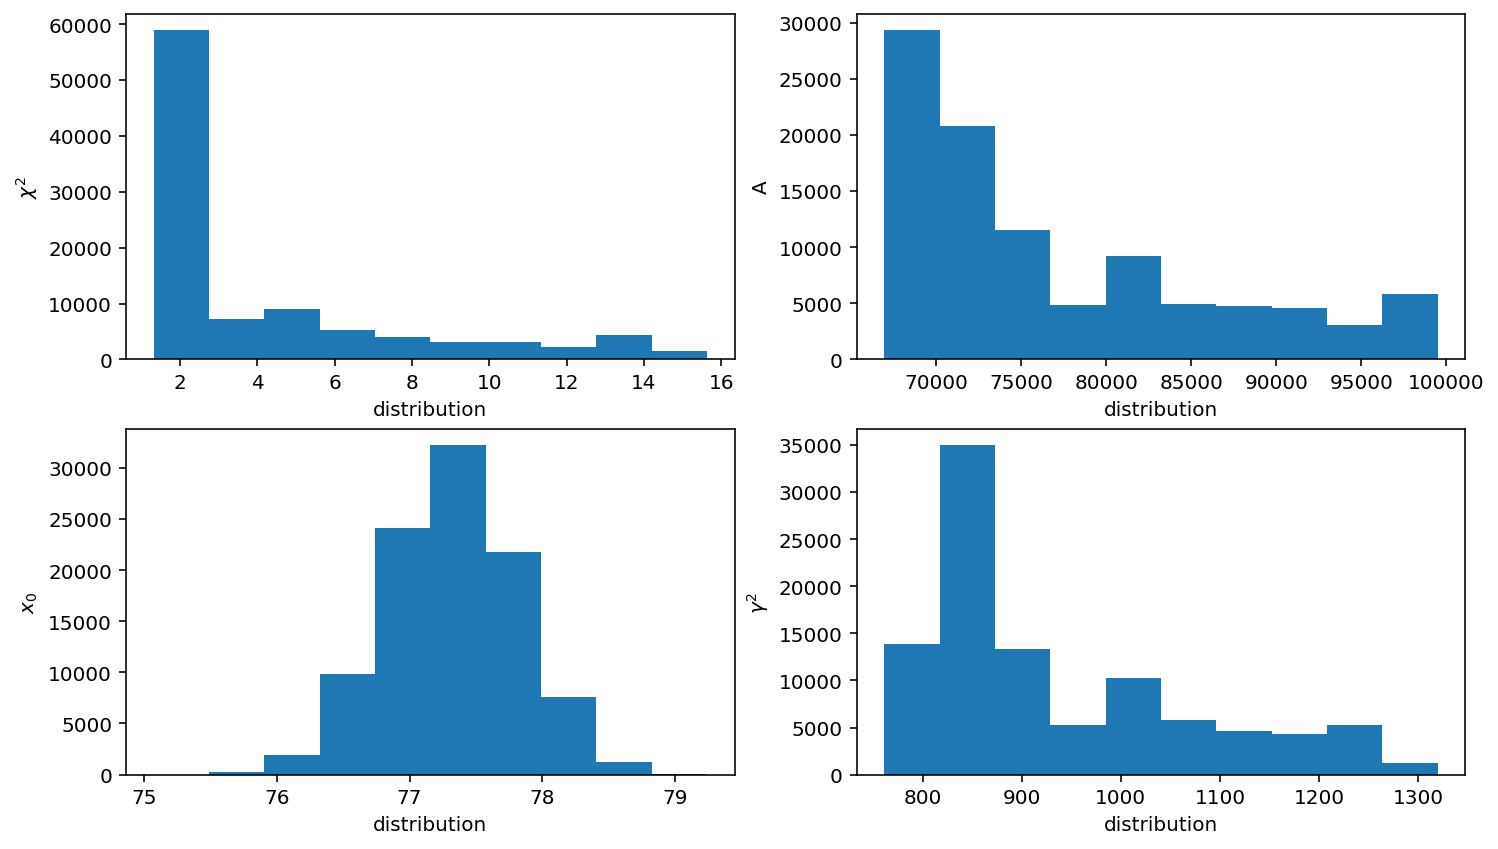

In [71]:
plt.subplot(2,2,1)
plt.hist(chisq_post)
plt.xlabel("distribution")
plt.ylabel("$\chi^{2}$")
plt.subplot(2,2,2)
plt.hist(A_post)
plt.xlabel("distribution")
plt.ylabel("A")
plt.subplot(2,2,3)
plt.hist(x0_post)
plt.xlabel("distribution")
plt.ylabel("$x_0$")
plt.subplot(2,2,4)
plt.hist(gammasq_post)
plt.xlabel("distribution")
plt.ylabel("$\gamma^{2}$")

It is often useful to summarise these posterior distributions by *summary statistics*. The most commonly used, which you will have seen in your own experience, are the mean and standard deviation. However, these are most relevant when a distribution is approximately normal (Gaussian). A more general method is to present a *confidence interval*: that is, the range of values of a parameter that we’re (say) 95% sure the true value lies within. 

To do this in `numpy`, we use the `quantile` function. For instance, `np.quantile(A_post, 0.025)` will return a value greater than 2.5% of the values in the posterior distribution of $A$. Repeat this with the 97.5% percentile and you get the 95% confidence interval: the range containing 95% of the posterior distribution.

**Use this function to estimate the 95% confidence interval for each of the fitting parameters.**

In [72]:
print("The 95% confidence interval for each of the fitting parameters is:")

print("{:<15}  {:<15}   {:<15}  {:<15}".format("chi^2", "A", "x0", "gamma^2"))

print("{:<15.10f}  {:<15.10f}  {:<15.10f}  {:<15.10f}".format(np.quantile(chisq_post,0.95),np.quantile(A_post,0.95),np.quantile(x0_post,0.95),np.quantile(gammasq_post,0.95)))

The 95% confidence interval for each of the fitting parameters is:
chi^2            A                 x0               gamma^2        
13.1889650601    97049.4201884685  78.1361195214    1225.3340665049


Another useful way of analysing MCMC posterior distributions is to identify any correlations between parameter values.

**Make scatter plots of $A$ vs $x_o$, $A$ vs $\gamma^2$, and $x_o$ vs $\gamma^2$. Do these plots indicate any correlation between these parameters?**

Text(0, 0.5, '$x_o$')

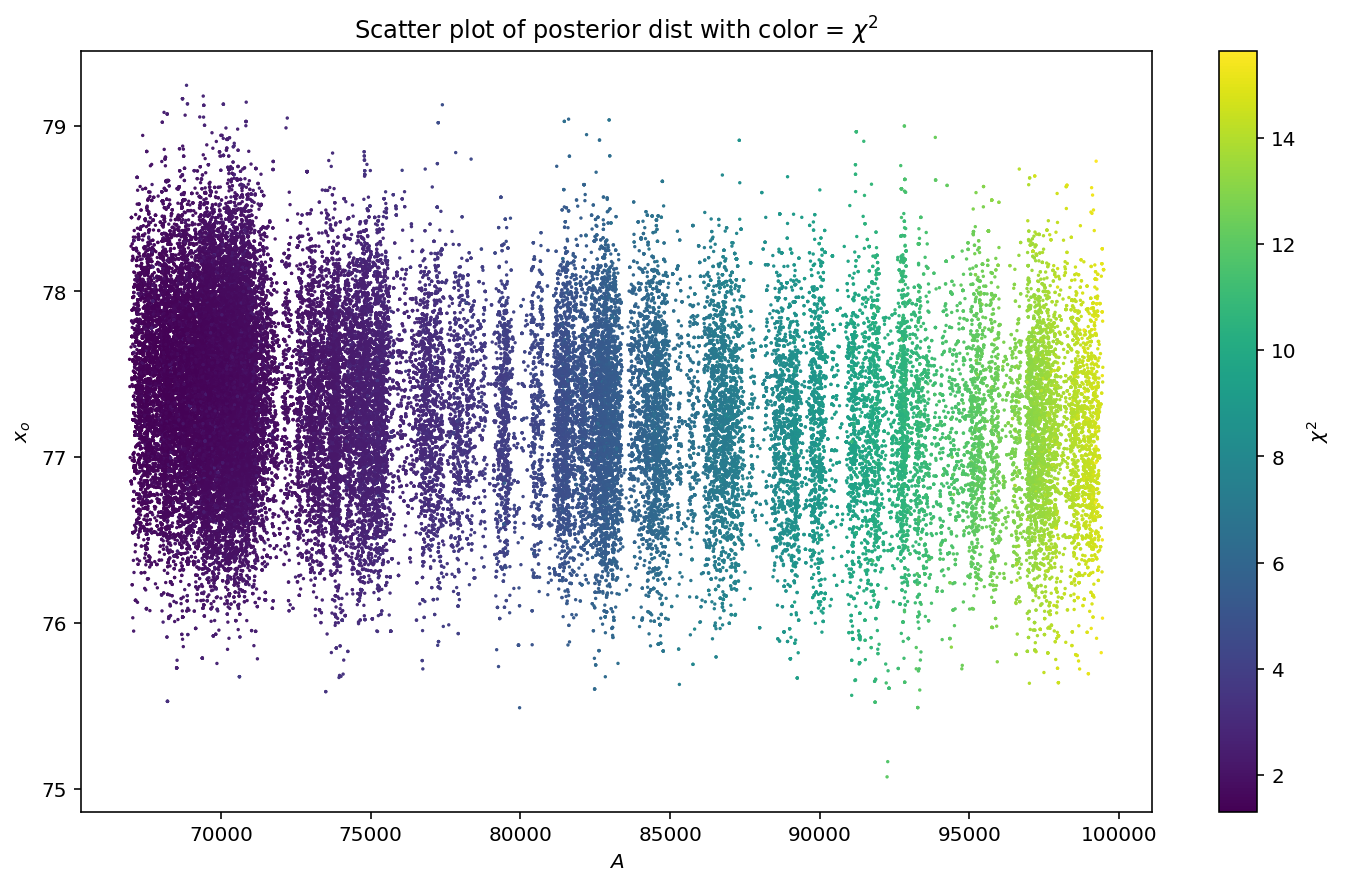

In [73]:
imin = np.argmin(chisq_post)
imax = np.argmax(chisq_post)

plt.figure()
plt.scatter(A_post,x0_post,s=.5,
            c=chisq_post,
            vmin=chisq_post[imin],
            vmax=chisq_post[imax])
plt.colorbar(label='$\chi^2$')
plt.title('Scatter plot of posterior dist with color = $\chi^2$')
plt.xlabel('$A$')
plt.ylabel('$x_o$')


Text(0, 0.5, '$\\gamma^{2}$')

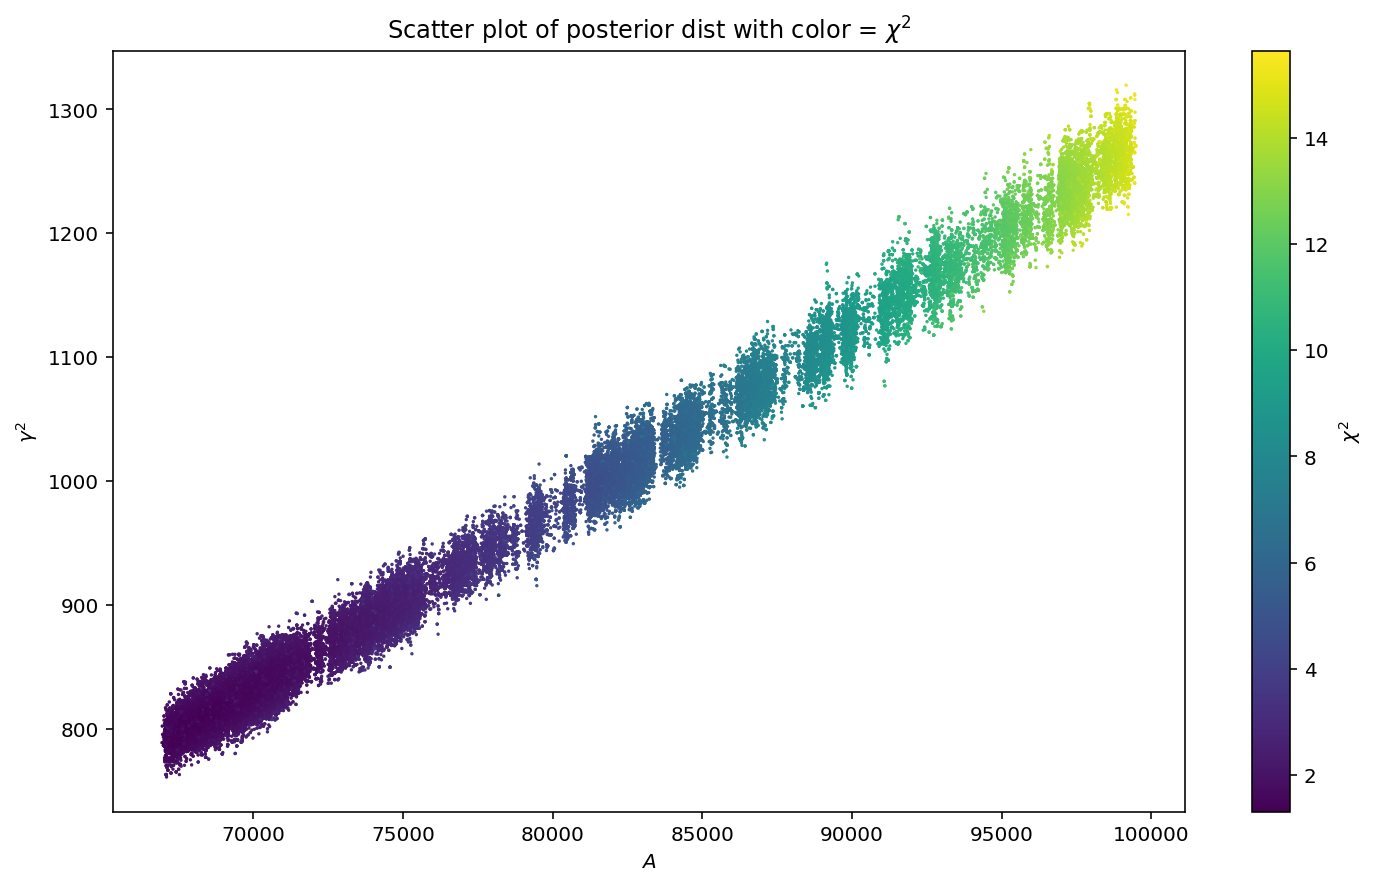

In [74]:
imin = np.argmin(chisq_post)
imax = np.argmax(chisq_post)

plt.figure()
plt.scatter(A_post,gammasq_post,s=.5,
            c=chisq_post,
            vmin=chisq_post[imin],
            vmax=chisq_post[imax])
plt.colorbar(label='$\chi^2$')
plt.title('Scatter plot of posterior dist with color = $\chi^2$')
plt.xlabel('$A$')
plt.ylabel('$\gamma^{2}$')

Text(0, 0.5, '$\\gamma^{2}$')

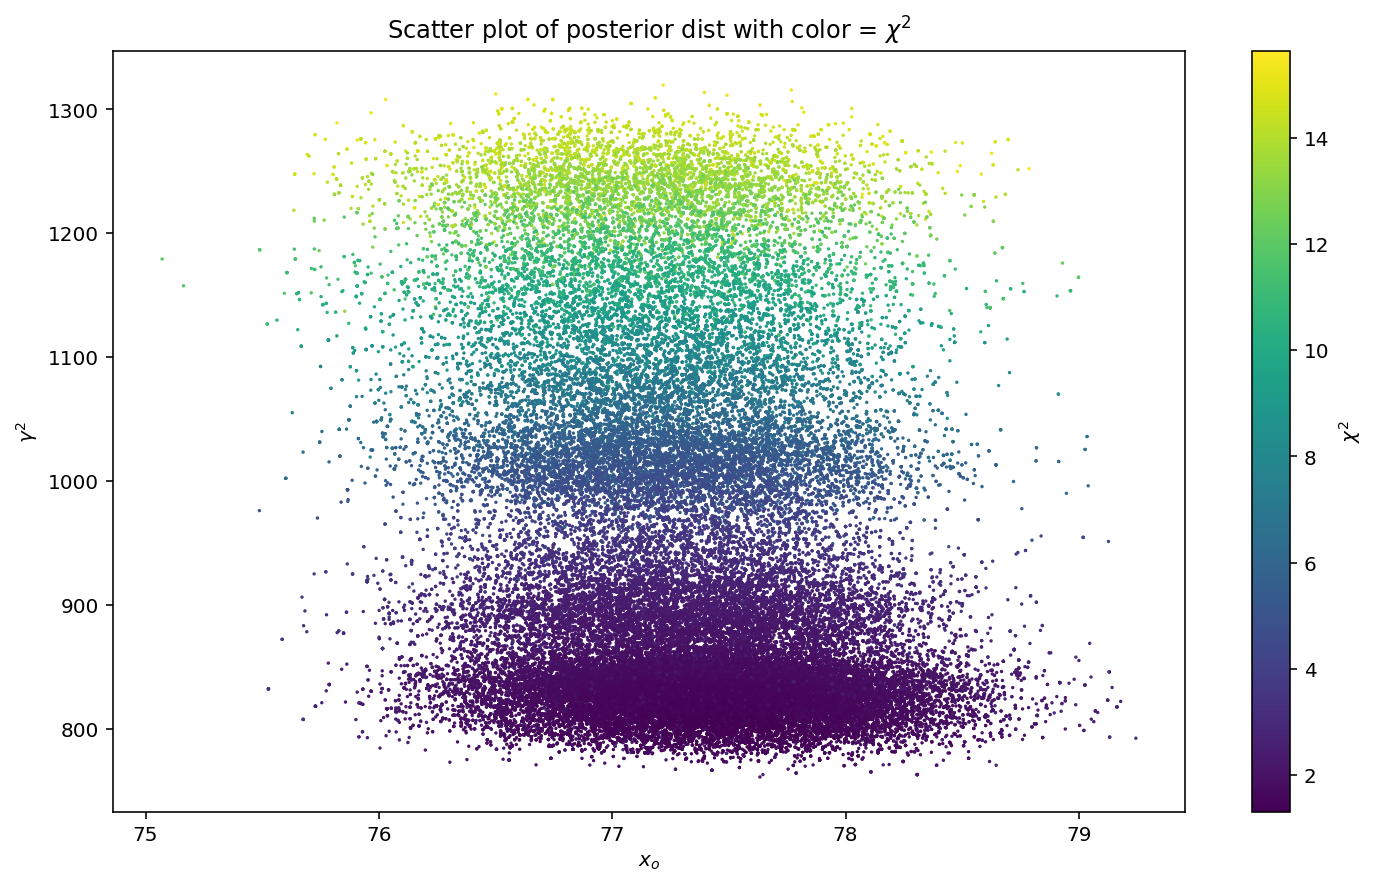

In [75]:
imin = np.argmin(chisq_post)
imax = np.argmax(chisq_post)

plt.figure()
plt.scatter(x0_post,gammasq_post,s=.5,
            c=chisq_post,
            vmin=chisq_post[imin],
            vmax=chisq_post[imax])
plt.colorbar(label='$\chi^2$')
plt.title('Scatter plot of posterior dist with color = $\chi^2$')
plt.xlabel('$x_o$')
plt.ylabel('$\gamma^{2}$')

Finally, armed with the idea of a confidence interval, we can now do better than taking a single curve of best fit: we can look at the *range* of curves represented by the posterior distribution.

To calculate a 95% confidence interval of best fit, we perform three steps:
1. Calculate the curve represented by a relatively large number of samples from the posterior. Here we take 200 points spaced by 50 steps, to avoid any correlation between them so that the sample is as fair as possible.
1. Calculate the 2.5th and 97.5th percentiles, using the `quantile()` function from `numpy` as above.
1. Use the `fill_between()` function from `matplotlib` to plot the range between these percentiles: that is, the 90% confidence interval for the “true“ value at each point on the graph.

**The code below uses these steps to plot a curve showing the confidence interval at each point on the $x$ axis, together with the observed experimental data.** Check that you understand how it works.

Text(0, 0.5, '$f(x)$')

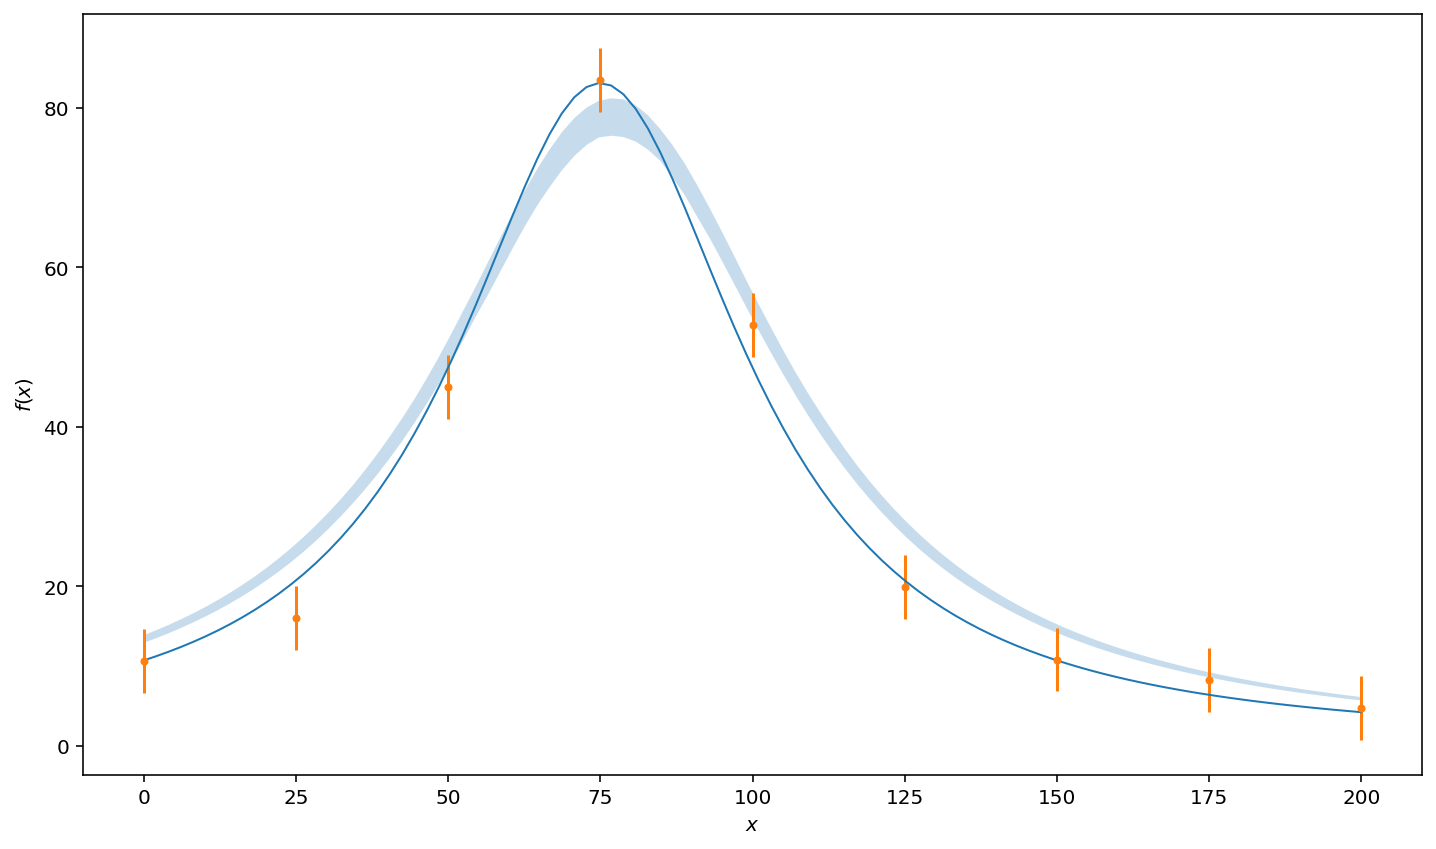

In [77]:
# Take random curves from the posterior
n_curves = 200
spacing = 50

models = np.array([lorentzian(xplot, (A_post[i*spacing], x0_post[i*spacing], gammasq_post[i*spacing]))
                   for i in range(n_curves)])

model_lowerq = np.quantile(models, 0.025, axis=0)
model_upperq = np.quantile(models, 0.975, axis=0)

plt.figure()
plt.fill_between(xplot, model_lowerq, model_upperq, alpha=0.25)
# alpha = transparency: 0 is transparent, 1 is opaque
plt.plot(xplot, lorentzian(xplot, param_guess), linewidth=1) # the code had a param_best that isn't defined anywhere (nor do we have instructions on how to write it) so i used param_guess from above
plt.errorbar(data_x, data_y, fmt='.', yerr=data_y_err)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')

### Explore

Some thoughts on things to explore in the solution:
* Explore the dependence of the quality of your initial guess on the quality of the best fit and the step size (Hint: remember your solution needs to be able to 'walk' through parameter space to the minimum of $\chi^2$).  If your walk fails to converge to a small value of $\chi^2$, try a larger step size in each parameter to see if this helps speed convergence.
* How sensitive is the final best fit to your initial guess?  Explore this by starting with the best initial guess you can generate through multiple trials (i.e., just by fitting by eye, see how low can you make $\chi^2$) and use this to improve your fit with the MCMC method.  Then see how poor you can make the initial fit parameters used with the MCMC method and still obtain a similar quality of fit.  
* Is the solution or posterior sensitive to where you slice to analyse the posterior?
* Try several different initial random number seeds and see if you get the same solution for $\chi^2$, the best fit and the iterations to a minimum.
* You might consider exploring changing the step size or $\beta$ here to improve your solution.

**Open a new markdown cell and record your findings**.    


Surprisingly, A and $\gamma^{2}$ give a better fit using a larger step size (50 & 30, I initially had 10 and 2). I expected the larger step size to give larger oscillations but it's the other way around, I guess it's becose the two values that work for the fit are high (69000,830).
Using values of x0 that are higher give a tiny posterior, so the calculations are all over the place. A larger starting A value gives an overflow and a larger minimum value of $\chi^{2}$ (in the 100-200 range). Larger starting values for $\gamma^{2}$ give a larger oscillation in the posterior and greater numbers for $\chi^{2}$, although only a bit larger than the one i found (around 5). The 95% confidence interval seems to be proportional to the slice value. A smaller $\beta$ results in larger fluctuations, using 5 gives a smaller  $\chi^{2}$, so I kept it.

▶ **CHECKPOINT 3**

#### Extension

Try using `curve_fit` to provide an alternate solution.  Compare your fit parameters to those obtained via standard packages.  You could examine how sensitive the solution for both the MCMC method and via `curve_fit` is to your initial guess of parameters, and for the MCMC Metropolis solution to $\beta$ and the step size.

Look at the cell below for documentation to use `curve_fit`



In [19]:
from scipy.optimize import curve_fit
?curve_fit

Signature:
curve_fit(
    f,
    xdata,
    ydata,
    p0=None,
    sigma=None,
    absolute_sigma=False,
    check_finite=True,
    bounds=(-inf, inf),
    method=None,
    jac=None,
    **kwargs,
)
Docstring:
Use non-linear least squares to fit a function, f, to data.

Assumes ``ydata = f(xdata, *params) + eps``.

Parameters
----------
f : callable
    The model function, f(x, ...). It must take the independent
    variable as the first argument and the parameters to fit as
    separate remaining arguments.
xdata : array_like or object
    The independent variable where the data is measured.
    Should usually be an M-length sequence or an (k,M)-shaped array for
    functions with k predictors, but can actually be any object.
ydata : array_like
    The dependent data, a length M array - nominally ``f(xdata, ...)``.
p0 : array_like, optional
    Initial guess for the parameters (length N). If None, then the
    initial values will all be 1 (if the number of parameters for the
    func